# Machine learning Part 1.

# content 

### 1. importing libraries and data

###  2. Data cleaning

###  3. Data prep for regression analysis

###  4. Regression analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"C:\Users\solza\Downloads\02-11-2023"

In [4]:
df = pd.read_csv(r"C:\Users\solza\Downloads\02-11-2023\prepared\citybike_T62.csv")

# 2. Data cleaning 

In [5]:
df.columns

Index(['Unnamed: 0', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'Rider_Gender', 'Distance'],
      dtype='object')

In [7]:
df.head(20)

,Unnamed: 0,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,Rider_Gender,Distance
0,0,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,Female,High_Latitude
1,1,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,Male,Mid_Latitude
2,2,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,Male,High_Latitude
3,3,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,Female,High_Latitude
4,4,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,Unknown,High_Latitude
5,5,14581,Fri,22,9/27/2013 22:01,293,Lafayette St & E 8 St,40.730287,-73.990765,9/27/2013 22:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,Female,Mid_Latitude
6,6,15022,Sun,13,9/29/2013 13:13,380,W 4 St & 7 Ave S,40.734011,-74.002939,9/29/2013 13:23,317,E 6 St & Avenue B,40.724537,-73.981854,639,Subscriber,Male,Mid_Latitude
7,7,16253,Sat,10,9/21/2013 10:48,346,Bank St & Hudson St,40.736529,-74.006180,9/21/2013 10:52,212,W 16 St & The High Line,40.743349,-74.006818,263,Subscriber,Male,Mid_Latitude
8,8,16745,Fri,12,9/20/2013 12:29,510,W 51 St & 6 Ave,40.760660,-73.980420,9/20/2013 12:40,422,W 59 St & 10 Ave,40.770513,-73.988038,666,Subscriber,Male,High_Latitude
9,9,19556,Tue,16,9/3/2013 16:56,446,W 24 St & 7 Ave,40.744876,-73.995299,9/3/2013 17:05,342,Columbia St & Rivington St,40.717400,-73.980166,582,Subscriber,Male,High_Latitude


In [8]:
df.shape

(50000, 18)

### Missing value

# check for missing values
df.isnull().sum()

### Duplicate check

In [10]:
dups = df.duplicated()

In [11]:
dups.shape # No dups

(50000,)

### Extreme value checks

C:\Users\solza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='end_station_latitude', ylabel='Density'>

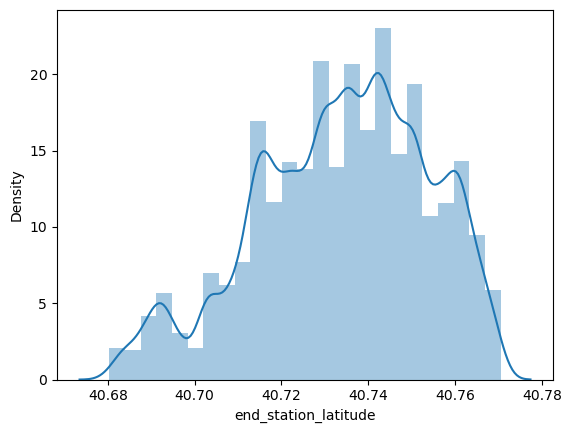

In [47]:
sns.distplot(df['end_station_latitude'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [48]:
df['end_station_latitude'].mean() # Check the mean

40.73385925934055

In [49]:
df['end_station_latitude'].median() # Check the median

40.73535398

In [50]:
df['end_station_latitude'].max() # Check the max

40.770513

## 3. Data Preparation for regression analysis

### Hypothesis :-  the start and end station have increasing latitudes.

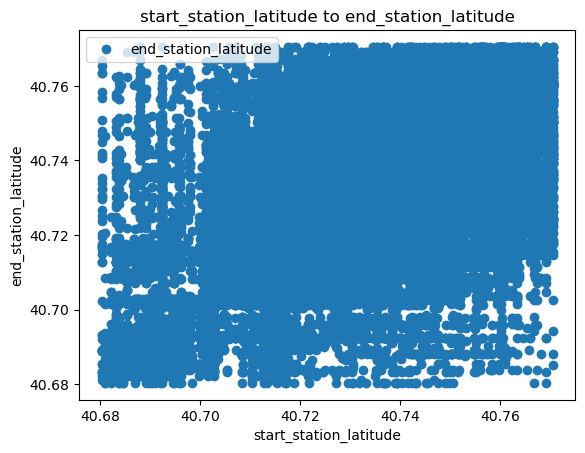

In [51]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'start_station_latitude', y='end_station_latitude',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('start_station_latitude to end_station_latitude')  
plt.xlabel('start_station_latitude')  
plt.ylabel('end_station_latitude')  
plt.show()

In [52]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['start_station_latitude'].values.reshape(-1,1)
y = df['end_station_latitude'].values.reshape(-1,1)

In [53]:
X

array([[40.75466591],
       [40.71939226],
       [40.76019252],
       ...,
       [40.7403432 ],
       [40.68528172],
       [40.76009437]])

In [54]:
y

array([[40.74238787],
       [40.7284186 ],
       [40.768254  ],
       ...,
       [40.75527307],
       [40.69331716],
       [40.75645824]])

In [55]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


## 4. Regration Analysis

In [56]:
# Create regression object
regression = LinearRegression()

In [57]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [58]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

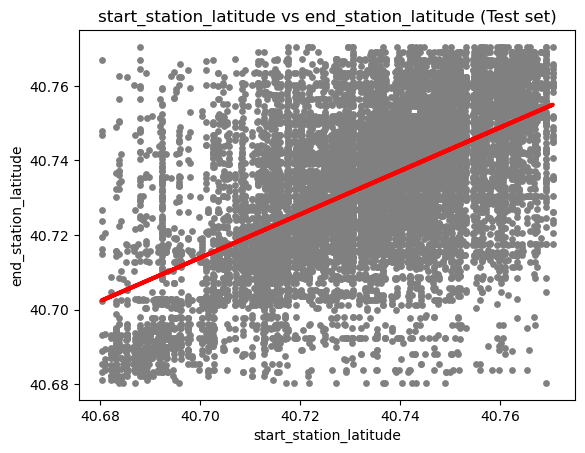

In [59]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('start_station_latitude vs end_station_latitude (Test set)')
plot_test.xlabel('start_station_latitude')
plot_test.ylabel('end_station_latitude')
plot_test.show()

### the line does not fit the data very well as we can see most of the data set does not touch the line of regression. it could mean that the relationship between the dependent and independent variables is not perfectly linear but, to check the accuracy of the model we can use summary stastics.

In [60]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [61]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.58257805]]
Mean squared error:  0.0002587450589621252
R2 score:  0.3465365226911724


### 1.the slope value indicates a positive relationship between the variables ( as x increase y increase as well).
### 2. the small value of MSE indicates its accuracy means that the regression line fits fairly the data points .
### 3. the R2 score shows the number is closer to 0 ( 0.346)  which means the model doesn't fit good enough to the data set.
    

In [62]:
y_predicted

array([[40.73269519],
       [40.75229625],
       [40.72687925],
       ...,
       [40.71917486],
       [40.72412218],
       [40.74936335]])

In [63]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,40.728739,40.732695
1,40.740259,40.752296
2,40.740583,40.726879
3,40.753231,40.748809
4,40.723180,40.730893
5,40.742354,40.746989
6,40.707065,40.721421
7,40.739323,40.733075
8,40.754666,40.742536
9,40.720664,40.724932


### compare how the regression fits the training set 

In [64]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [65]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [66]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.58257805]]
Mean squared error:  0.0002603474192550709
R2 score:  0.3411233749256687


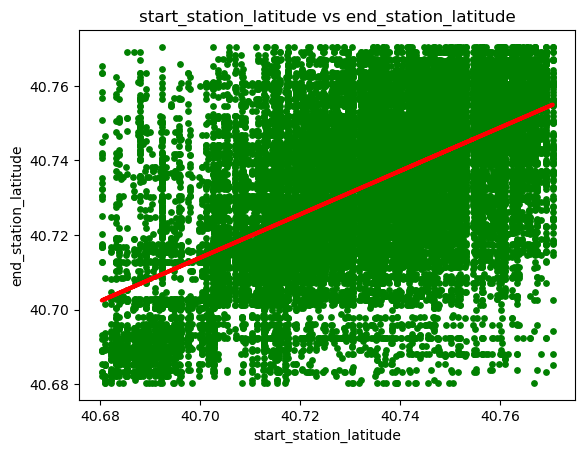

In [67]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('start_station_latitude vs end_station_latitude')
plot_test.xlabel('start_station_latitude')
plot_test.ylabel('end_station_latitude')
plot_test.show()

###  The model shows the training set has slightly lower R2 score than the test  set ( R2 scores = 0.341).

### conclusion :-  the data set has a wide dispersion of points but as we see the accuracy of the model using summery stastics --- the slope and RMS ,  tells how good the performance of the model is. overall the start and end station has increasing latitude but this hypothesis mght be partialy true.